## Dataset: https://github.com/knowaminul/BDIndigenousFish2019
## Source Paper: https://ieeexplore.ieee.org/document/9036679

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D, UpSampling2D, AveragePooling2D,ZeroPadding2D,Convolution2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import tensorflow.keras.backend as K
from IPython.display import SVG, Image
import cv2
import utils
import seaborn as sns
sns.set()

In [2]:
img_size=(80,80)
batch_size = 16
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("BDIndigenousFish2019/training/BDIndigenousFish2019",
target_size=img_size,
batch_size=batch_size,
class_mode='categorical',
color_mode ="rgb",
shuffle=True)

datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_validation.flow_from_directory("BDIndigenousFish2019/validation/BDIndigenousFish2019",
target_size=img_size,
batch_size=batch_size,
class_mode='categorical',
color_mode ="rgb",
shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
test_generator=datagen_test.flow_from_directory("BDIndigenousFish2019/testing/BDIndigenousFish2019",
target_size=img_size,
batch_size=batch_size,
class_mode='categorical',
color_mode ="rgb",
shuffle=True)

Found 2089 images belonging to 8 classes.
Found 260 images belonging to 8 classes.
Found 261 images belonging to 8 classes.


In [3]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(80, 80, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))


cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))


cnn_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))



cnn_model.add(Conv2D(512, (3, 3), activation='relu',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.2))


cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(8, activation='softmax'))
optimum= Adam(learning_rate=0.00001)


def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

cnn_model.compile(loss='categorical_crossentropy', optimizer=optimum, metrics=['accuracy',recall,precision,tf.keras.metrics.AUC(curve="ROC"),tf.keras.metrics.FalsePositives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.SensitivityAtSpecificity(0.5)])

In [4]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 80, 80, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       7

In [5]:
%%time
batch_size = 16


ephocs=80
                    

steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps
hist_model = cnn_model.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps
                    )


Epoch 1/80
130/130 [==============================] - 7s 25ms/step - loss: 2.6108 - accuracy: 0.1973 - recall: 0.0865 - precision: 0.2352 - auc: 0.5897 - false_positives: 572.0000 - true_positives: 180.0000 - false_negatives: 1893.0000 - true_negatives: 13939.0000 - sensitivity_at_specificity: 0.6020 - val_loss: 1.9789 - val_accuracy: 0.2422 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.6417 - val_false_positives: 0.0000e+00 - val_true_positives: 0.0000e+00 - val_false_negatives: 256.0000 - val_true_negatives: 1792.0000 - val_sensitivity_at_specificity: 0.6797
Epoch 2/80
130/130 [==============================] - 3s 20ms/step - loss: 2.0711 - accuracy: 0.3034 - recall: 0.1103 - precision: 0.3529 - auc: 0.6916 - false_positives: 399.0000 - true_positives: 227.0000 - false_negatives: 1846.0000 - true_negatives: 14112.0000 - sensitivity_at_specificity: 0.7453 - val_loss: 1.6887 - val_accuracy: 0.4688 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.818

In [6]:
cnn_model.evaluate(test_generator,verbose=1)

17/17 [==============================] - 0s 20ms/step - loss: 0.0815 - accuracy: 0.9732 - recall: 0.9706 - precision: 0.9779 - auc: 0.9994 - false_positives: 6.0000 - true_positives: 253.0000 - false_negatives: 8.0000 - true_negatives: 1821.0000 - sensitivity_at_specificity: 1.0000


[0.08149583637714386,
 0.9731800556182861,
 0.970588207244873,
 0.9779411554336548,
 0.9994264841079712,
 6.0,
 253.0,
 8.0,
 1821.0,
 1.0]

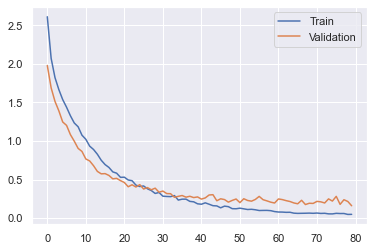

In [7]:
plt.plot(hist_model.history['loss'], label='Train')
plt.plot(hist_model.history['val_loss'], label='Validation')
plt.legend()
plt.show()



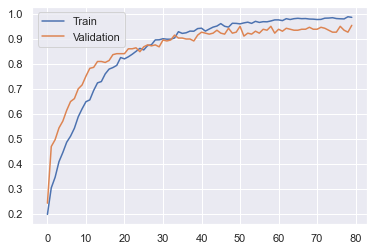

In [8]:
plt.plot(hist_model.history['accuracy'], label='Train')
plt.plot(hist_model.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()
